In [1]:
### 求解k空间矩阵得到石墨烯能带 ##

import numpy as np
from math import pi, sqrt, sin, cos, tanh, atan2
from cmath import rect
import kwant
from matplotlib import pyplot
from scipy import sparse
from mpl_toolkits.mplot3d import Axes3D
%matplotlib
kron = np.kron

sigma_0 = np.eye(2)
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])
k_x=0.
k_y=0.
t=-1
##### k空间 #####
def hamiltonian(k_x,k_y):
    
    hamiltonian=(sigma_x*(2*cos(k_x/2)*cos(k_y*sqrt(3)/2)+cos(k_x))
                 -sigma_y*(2*sin(k_x/2)*cos(k_y*sqrt(3)/2)-sin(k_x)))
    return hamiltonian
k_x_list=np.linspace(-4.,4.,1000)
k_y_list=np.linspace(-4.,4.,1000)
energies=[]
## 指定k_y 画E~k_x图 ##
for k_x in k_x_list:
    b=3*sqrt(3)
    a=2*pi/b
    matrix=hamiltonian(k_x,k_y=a)
    energy,wavef=np.linalg.eigh(matrix)
    energies.append(energy)

pyplot.figure()
pyplot.plot(k_x_list,energies)
pyplot.xlabel("${\k_z}$")
pyplot.ylabel("$E$")
pyplot.show()


Using matplotlib backend: TkAgg


[[-4.         -3.99199199 -3.98398398 ...,  3.98398398  3.99199199  4.        ]
 [-4.         -3.99199199 -3.98398398 ...,  3.98398398  3.99199199  4.        ]
 [-4.         -3.99199199 -3.98398398 ...,  3.98398398  3.99199199  4.        ]
 ..., 
 [-4.         -3.99199199 -3.98398398 ...,  3.98398398  3.99199199  4.        ]
 [-4.         -3.99199199 -3.98398398 ...,  3.98398398  3.99199199  4.        ]
 [-4.         -3.99199199 -3.98398398 ...,  3.98398398  3.99199199  4.        ]]
[[-4.         -4.         -4.         ..., -4.         -4.         -4.        ]
 [-3.99199199 -3.99199199 -3.99199199 ..., -3.99199199 -3.99199199
  -3.99199199]
 [-3.98398398 -3.98398398 -3.98398398 ..., -3.98398398 -3.98398398
  -3.98398398]
 ..., 
 [ 3.98398398  3.98398398  3.98398398 ...,  3.98398398  3.98398398
   3.98398398]
 [ 3.99199199  3.99199199  3.99199199 ...,  3.99199199  3.99199199
   3.99199199]
 [ 4.          4.          4.         ...,  4.          4.          4.        ]]
1000
[[[-0.97750

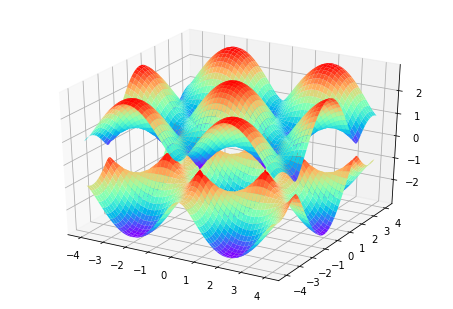

In [2]:
## 三维画图 ## 
# 定义数据 #

fig = pyplot.figure()
ax1 = Axes3D(fig)
k_x = k_x_list
k_y = k_y_list
K_X,K_Y = np.meshgrid(k_x,k_y)
print(K_X)
print(K_Y)
print(len(K_X[1]))
E = np.zeros((1000,1000,2))
# 
for i in range(len(K_X[0])):
    for j in range (len(K_X)):
                energy,wavef = np.linalg.eigh(hamiltonian(K_X[i][j],K_Y[i][j]))
                E[i,j,:]=np.sort(np.real(energy[:]))
#E=np.sin(K_X)+np.cos(K_Y)#right
#E=np.linalg.eigh(hamiltonian(k_x  ,k_y ))
# for k_y in K_Y
# for k_x in K_X
print(E)
print(len(E))
# for k_x in k_x_list:
#     for k_y in k_y_list:
#         E = hamiltonian(k_x=K_X,k_y=K_Y)#false

# 作图 #
for b in range(2):
    #ax1.plot_surface(K_X,K_Y,E[:,:,b],rstride = 1, cstride = 1,cmap='rainbow')
    ax1.plot_surface(K_X,K_Y,E[:,:,b],cmap='rainbow')
pyplot.show()



In [1]:
a =[[1,1],[2,4],[1,3]]
print(a[1,1])

TypeError: list indices must be integers or slices, not tuple